# Kaggle Competition: Regression With An Abalone Dataset

Tim: Barudak Bojongsoang

Members:
1.   Akmal Muzakki Bakir
2.   Muhammad Sya'bani Falif
3.   Muhammad Zaki Rabbani



## Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

!pip install optuna
import optuna

!pip install catboost

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 924.2 kB/s eta 0:00:00


## Reading The Dataset

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [ ]:
submission.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


## Deleting ID Column

In [ ]:
train_df.drop("id", axis=1, inplace=True)
indexes = test_df["id"]
test_df.drop("id", axis=1, inplace=True)

## Renaming Dataframe Columns

In [ ]:
train_df.rename(columns={'Whole weight.1':'Whole_weight_1',
                      'Whole weight.2':'Whole_weight_2',
                      'Whole weight':'Whole_weight',
                      'Shell weight':'Shell_weight'},inplace=True)

test_df.rename(columns={'Whole weight.1':'Whole_weight_1',
                     'Whole weight.2':'Whole_weight_2',
                     'Whole weight':'Whole_weight',
                     'Shell weight':'Shell_weight'},inplace=True)

## Checking Dataframe

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole_weight    90615 non-null  float64
 5   Whole_weight_1  90615 non-null  float64
 6   Whole_weight_2  90615 non-null  float64
 7   Shell_weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
list(train_df.columns)

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Whole_weight_1',
 'Whole_weight_2',
 'Shell_weight',
 'Rings']

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole_weight    60411 non-null  float64
 5   Whole_weight_1  60411 non-null  float64
 6   Whole_weight_2  60411 non-null  float64
 7   Shell_weight    60411 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.7+ MB


## EDA

### Defining Analysis Questions


1.   Bagaimana Distribusi Jenis Kelamin ?
2.   Bagaimana Distribusi Length Berdasarkan Jenis Kelamin ?
3.   Bagaimana Distribusi Diameter Berdasarkan Jenis Kelamin ?
4.   Bagaimana Distribusi Height Berdasarkan Jenis Kelamin ?
5.   Bagaimana Distribusi Whole Weight Berdasarkan Jenis Kelamin ?
6.   Bagaimana Distribusi Whole Weight 1 Berdasarkan Jenis Kelamin ?
7.   Bagaimana Distribusi Whole Weight 2 Berdasarkan Jenis Kelamin ?
8.   Bagaimana Distribusi Shell Weight Berdasarkan Jenis Kelamin ?


### Distribusi Jenis Kelamin

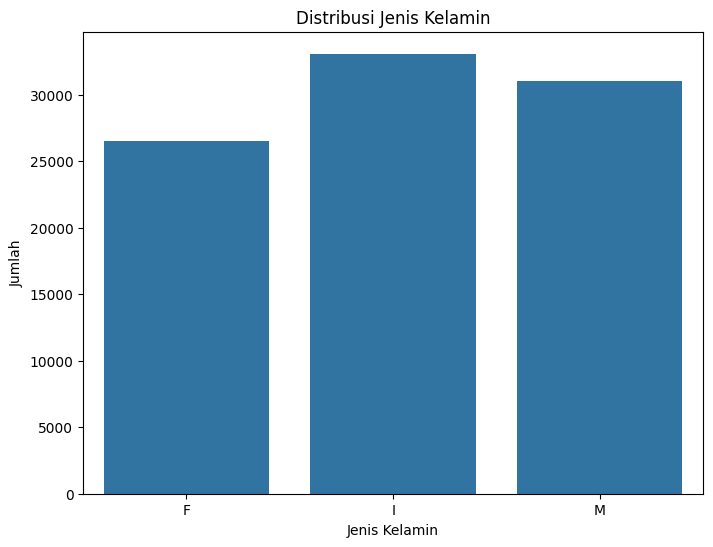

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sex')
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Length Berdasarkan Jenis Kelamin

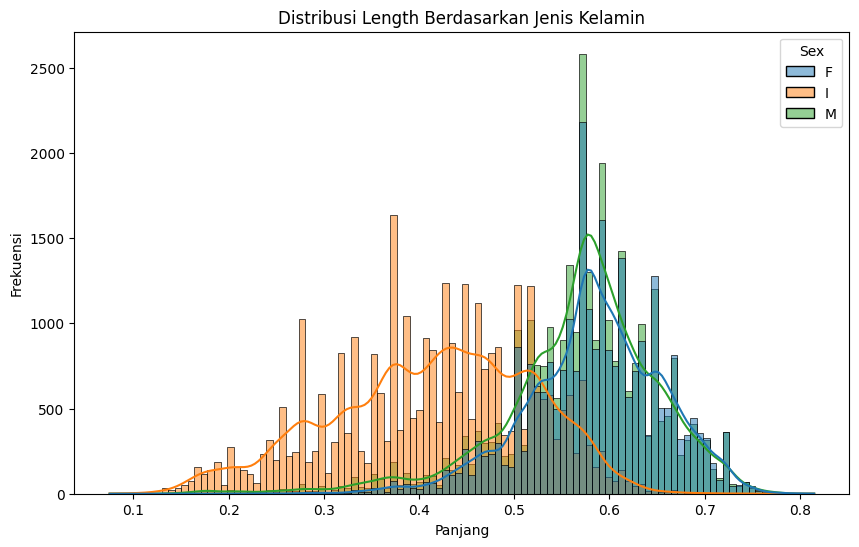

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Length', hue='Sex', kde=True)
plt.title('Distribusi Length Berdasarkan Jenis Kelamin')
plt.xlabel('Panjang')
plt.ylabel('Frekuensi')
plt.show()

### Distribusi Diameter Berdasarkan Jenis Kelamin

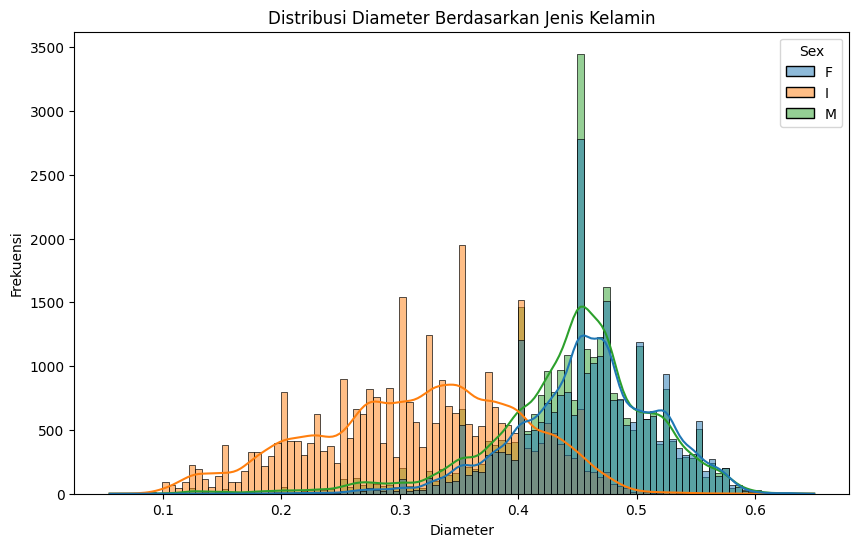

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Diameter', hue='Sex', kde=True)
plt.title('Distribusi Diameter Berdasarkan Jenis Kelamin')
plt.xlabel('Diameter')
plt.ylabel('Frekuensi')
plt.show()

### Distribusi Height Berdasarkan Jenis Kelamin

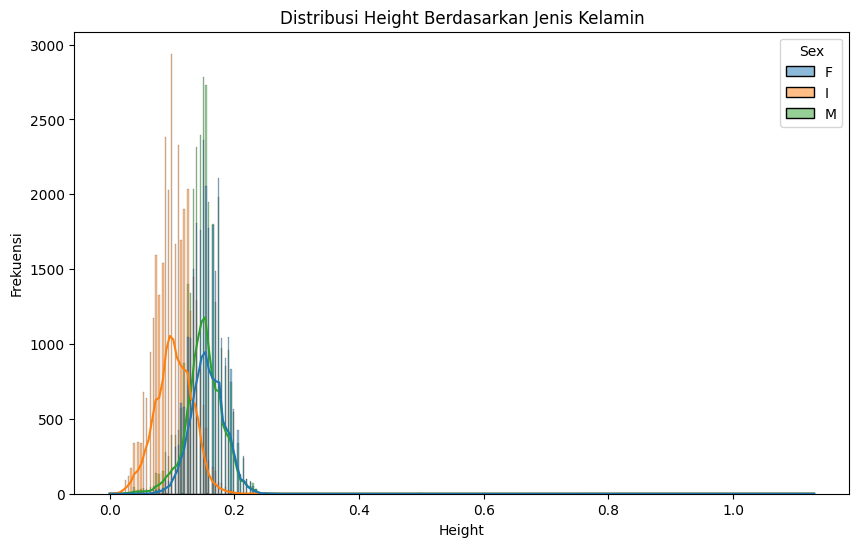

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Height', hue='Sex', kde=True)
plt.title('Distribusi Height Berdasarkan Jenis Kelamin')
plt.xlabel('Height')
plt.ylabel('Frekuensi')
plt.show()

### Distribusi Whole Weight Berdasarkan Jenis Kelamin





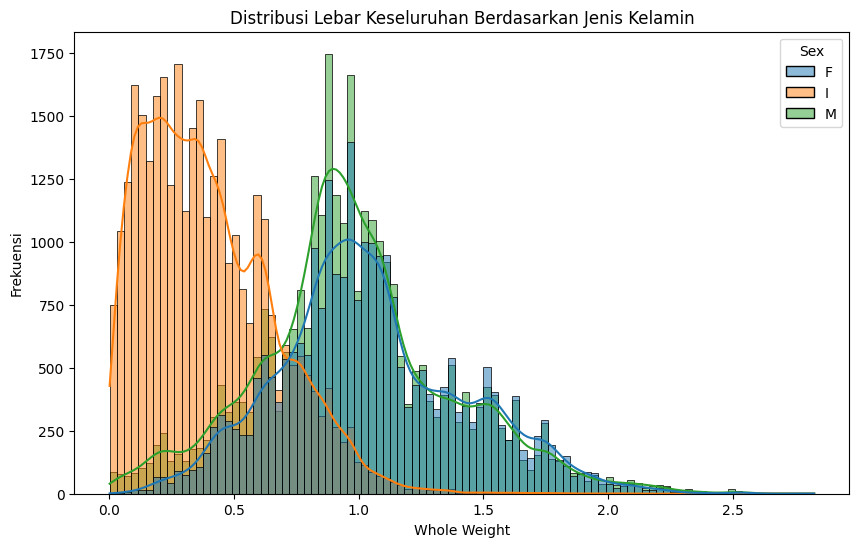

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Whole_weight', hue='Sex', kde=True)
plt.title('Distribusi Lebar Keseluruhan Berdasarkan Jenis Kelamin')
plt.xlabel('Whole Weight')
plt.ylabel('Frekuensi')
plt.show()

### Distribusi Whole Weight 1 Berdasarkan Jenis Kelamin

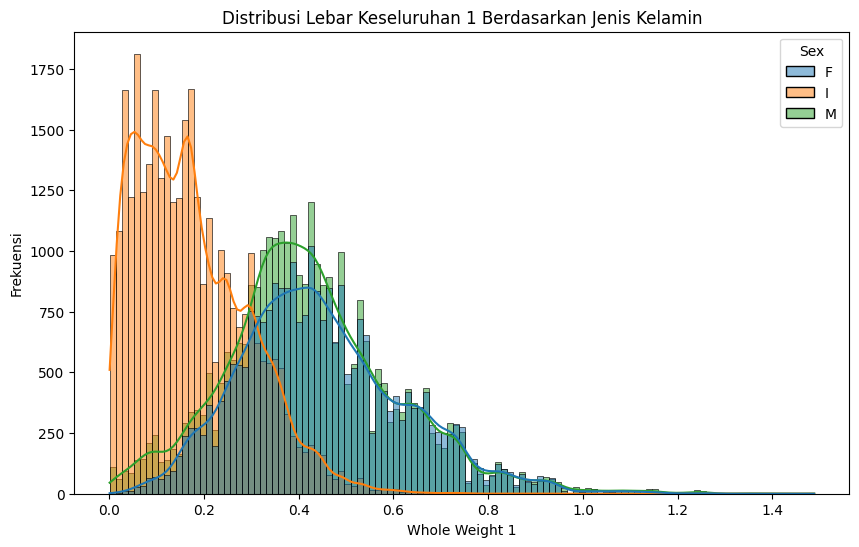

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Whole_weight_1', hue='Sex', kde=True)
plt.title('Distribusi Lebar Keseluruhan 1 Berdasarkan Jenis Kelamin')
plt.xlabel('Whole Weight 1')
plt.ylabel('Frekuensi')
plt.show()

### Distribusi Whole Weight 2 Berdasarkan Jenis Kelamin

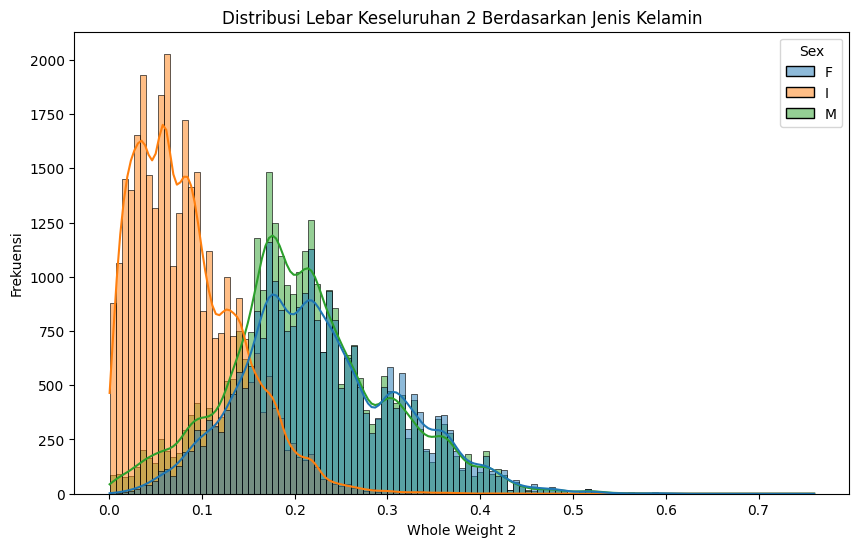

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Whole_weight_2', hue='Sex', kde=True)
plt.title('Distribusi Lebar Keseluruhan 2 Berdasarkan Jenis Kelamin')
plt.xlabel('Whole Weight 2')
plt.ylabel('Frekuensi')
plt.show()

### Distribusi Shell Weight Berdasarkan Jenis Kelamin

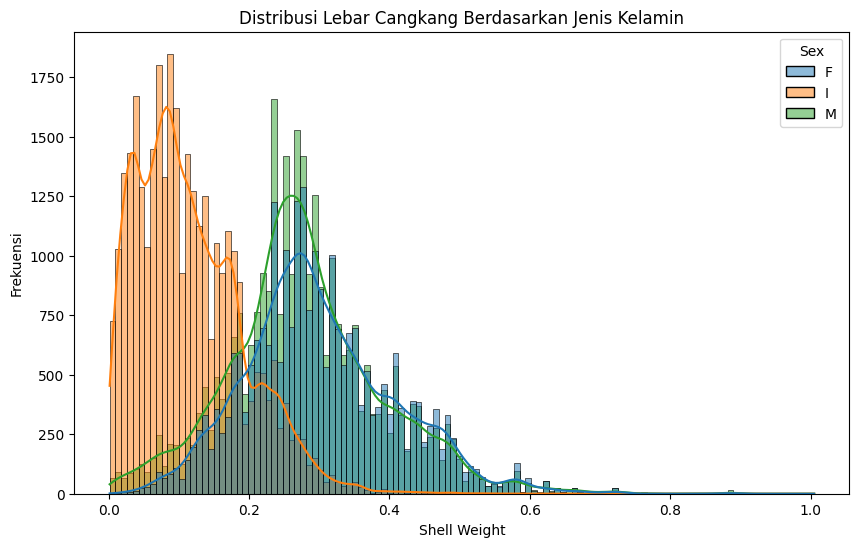

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Shell_weight', hue='Sex', kde=True)
plt.title('Distribusi Lebar Cangkang Berdasarkan Jenis Kelamin')
plt.xlabel('Shell Weight')
plt.ylabel('Frekuensi')
plt.show()

## Data Preprocessing

### Encode The Categorical Variable

In [ ]:
ohe = OneHotEncoder(drop='first')

encoded_train = ohe.fit_transform(train_df[['Sex']])
encoded_test = ohe.fit_transform(test_df[['Sex']])

In [ ]:
encoded_train_df = pd.DataFrame(encoded_train.toarray(), columns=ohe.get_feature_names_out(["Sex"]))
encoded_test_df = pd.DataFrame(encoded_test.toarray(), columns=ohe.get_feature_names_out(['Sex']))

In [ ]:
train_df_encoded = pd.concat([train_df.drop(columns=["Sex"]), encoded_train_df], axis=1)
test_df_encoded = pd.concat([test_df.drop(columns=["Sex"]), encoded_test_df], axis=1)

In [ ]:
train_df_encoded.head()

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Rings,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0.0,0.0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,0.0,0.0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,1.0,0.0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0,1.0
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,1.0,0.0


In [ ]:
test_df_encoded.head()

,Length,Diameter,Height,Whole_weight,Whole_weight_1,Whole_weight_2,Shell_weight,Sex_I,Sex_M
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0.0,1.0
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0.0,1.0
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0.0,1.0
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0.0,1.0
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,1.0,0.0


### Splitting The Dataset

In [ ]:
X = train_df_encoded.drop("Rings", axis=1)
y = train_df_encoded["Rings"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 42)

In [ ]:
categorical_cols = ["Sex"]
numerical_cols = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

In [ ]:
numerical_cols

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Whole_weight_1',
 'Whole_weight_2',
 'Shell_weight',
 'Sex_I',
 'Sex_M']

### Scaling The Dataset

In [ ]:
robust_scaler = RobustScaler()

X_train[numerical_cols] = robust_scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = robust_scaler.transform(X_val[numerical_cols])
test_df[numerical_cols] = robust_scaler.transform(test_df_encoded[numerical_cols])

In [ ]:
test_df_encoded[numerical_cols] = robust_scaler.transform(test_df_encoded[numerical_cols])

## Creating Machine Learning Model

### CatBoost Regressor

In [ ]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 100),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100),
        'random_strength': trial.suggest_loguniform('random_strength', 0.01, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'eval_metric': 'RMSE',
        'logging_level': 'Silent',
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'bootstrap_type': 'Bayesian',
        'model_size_reg': trial.suggest_float('model_size_reg', 0.1, 10.0),
}

    catboost_model = CatBoostRegressor(**params)

    catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))
    y_pred = catboost_model.predict(X_val)

    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

    return rmsle

#### Hyperparameter Tuning

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-04-15 13:59:05,147] A new study created in memory with name: no-name-7f950c60-e2a1-4fdf-8b13-707d47e38e66
<ipython-input-31-0d6dcca5df6e>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
<ipython-input-31-0d6dcca5df6e>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 100),
<ipython-input-31-0d6dcca5df6e>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature':

In [ ]:
print('Best Params:', study.best_params)
print('Best RMSLE:', study.best_value)

Best Params: {'learning_rate': 0.10038825956585645, 'depth': 7, 'l2_leaf_reg': 3.88981444303897, 'bagging_temperature': 0.05884666093240218, 'random_strength': 0.04378964785044822, 'border_count': 212, 'colsample_bylevel': 0.8767966550062062, 'min_child_samples': 29, 'model_size_reg': 4.360144893682055}
Best RMSLE: 0.15035605477319156


In [ ]:
best_catboost_model = CatBoostRegressor(**study.best_params, random_state=42)
best_catboost_model.fit(X_train, y_train)


y_pred = best_catboost_model.predict(X_val)
rmsle_value = np.sqrt(mean_squared_log_error(y_val, y_pred))
print("RMSLE After OPTUNA:", rmsle_value)

0:	learn: 3.0040640	total: 11.9ms	remaining: 11.9s
1:	learn: 2.8582312	total: 23.7ms	remaining: 11.8s
2:	learn: 2.7312829	total: 33.8ms	remaining: 11.2s
3:	learn: 2.6213692	total: 43.6ms	remaining: 10.9s
4:	learn: 2.5272471	total: 54.8ms	remaining: 10.9s
5:	learn: 2.4439475	total: 64.9ms	remaining: 10.8s
6:	learn: 2.3748290	total: 74.6ms	remaining: 10.6s
7:	learn: 2.3129511	total: 84.5ms	remaining: 10.5s
8:	learn: 2.2597225	total: 94.6ms	remaining: 10.4s
9:	learn: 2.2147596	total: 108ms	remaining: 10.7s
10:	learn: 2.1745625	total: 122ms	remaining: 11s
11:	learn: 2.1410287	total: 138ms	remaining: 11.3s
12:	learn: 2.1116695	total: 151ms	remaining: 11.4s
13:	learn: 2.0854069	total: 160ms	remaining: 11.3s
14:	learn: 2.0633877	total: 175ms	remaining: 11.5s
15:	learn: 2.0442919	total: 186ms	remaining: 11.4s
16:	learn: 2.0271785	total: 196ms	remaining: 11.3s
17:	learn: 2.0126113	total: 210ms	remaining: 11.4s
18:	learn: 1.9995269	total: 240ms	remaining: 12.4s
19:	learn: 1.9881207	total: 250ms	

### XGBoost Regressor

In [ ]:
# ?XGBoostRegressor

#### Hyperparameter Tuning

### LightBGM Regressor

In [ ]:
lgbm_model = LGBMRegressor(random_state=42, verbosity=-1)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_val)
print(np.sqrt(mean_squared_log_error(y_val, y_pred)))

0.15176637802771334


In [ ]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbosity': -1}

#### Hyperparameter Tuning

In [ ]:
def objective(trial):
    params = {
        'objective': 'regression',
        'metric':    'rmsle',
        'learning_rate': trial.suggest_categorical('learning_rate', [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.5]),
        'n_estimators':  trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth':     trial.suggest_int('max_depth', 5, 50),
        'subsample':     trial.suggest_float('subsample', 0.6, 1.0, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0, step=0.1),
        "min_child_weight": trial.suggest_float("min_child_weight", 0.1, 8, step=0.5)
    }

    model = LGBMRegressor(**params, verbosity=-1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

    return rmsle

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-04-15 14:17:01,083] A new study created in memory with name: no-name-17c618ac-7893-4fc9-9d47-a781f55743ec
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.1, 8] and step=0.5, but the range is not divisible by `step`. It will be replaced by [0.1, 7.6].
  warnings.warn(
[I 2024-04-15 14:17:02,820] Trial 0 finished with value: 0.15670208512403072 and parameters: {'learning_rate': 0.01, 'n_estimators': 250, 'max_depth': 7, 'subsample': 0.6, 'colsample_bytree': 1.0, 'min_child_weight': 7.1}. Best is trial 0 with value: 0.15670208512403072.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:685: UserWarning: The distribution is specified by [0.1, 8] and step=0.5, but the range is not divisible by `step`. It will be replaced by [0.1, 7.6].
  warnings.warn(
[I 2024-04-15 14:17:06,846] Trial 1 finished with value: 0.15061081522203104 and parameters: {'learning_rate': 0.08, 'n_estimators': 950, 'max_depth':

In [ ]:
print('Best Params:', study.best_params)
print('Best RMSLE:', study.best_value)

Best Params: {'learning_rate': 0.08, 'n_estimators': 600, 'max_depth': 6, 'subsample': 1.0, 'colsample_bytree': 0.6, 'min_child_weight': 0.6}
Best RMSLE: 0.15019055428908762


In [ ]:
best_lgbm_model = LGBMRegressor(**study.best_params, verbosity=-1, random_state=42)
best_lgbm_model.fit(X_train, y_train, eval_metric="rmsle")


y_pred = best_lgbm_model.predict(X_val)
rmsle_value = np.sqrt(mean_squared_log_error(y_val, y_pred))
print("RMSLE After OPTUNA:", rmsle_value)

RMSLE After OPTUNA: 0.15019055428908762


### Stacking Regressor

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_log_error

# Buat StackingRegressor dengan model-model dasar yang sudah dilatih
stacked_model = StackingRegressor(
    estimators=[('catboost', best_catboost_model), ('lgbm', best_lgbm_model)],
    final_estimator=CatBoostRegressor(),  # Anda dapat menggunakan model lain sebagai final estimator
    cv=5
)

# Latih StackingRegressor
stacked_model.fit(X_train, y_train)

# Lakukan prediksi dengan StackingRegressor
y_pred_stacked = stacked_model.predict(X_val)

# Hitung RMSLE untuk prediksi StackingRegressor
rmsle_stacked = np.sqrt(mean_squared_log_error(y_val, y_pred_stacked))
print("RMSLE untuk StackingRegressor:", rmsle_stacked)

Streaming output truncated to the last 5000 lines.
2:	learn: 2.7265351	total: 35.7ms	remaining: 11.9s
3:	learn: 2.6186296	total: 45.4ms	remaining: 11.3s
4:	learn: 2.5258778	total: 53.9ms	remaining: 10.7s
5:	learn: 2.4426973	total: 62.3ms	remaining: 10.3s
6:	learn: 2.3702301	total: 70.4ms	remaining: 9.98s
7:	learn: 2.3082559	total: 78.3ms	remaining: 9.7s
8:	learn: 2.2545327	total: 86.2ms	remaining: 9.5s
9:	learn: 2.2109093	total: 94.2ms	remaining: 9.32s
10:	learn: 2.1698806	total: 103ms	remaining: 9.28s
11:	learn: 2.1355983	total: 112ms	remaining: 9.22s
12:	learn: 2.1067056	total: 121ms	remaining: 9.18s
13:	learn: 2.0809471	total: 129ms	remaining: 9.09s
14:	learn: 2.0583728	total: 138ms	remaining: 9.05s
15:	learn: 2.0397939	total: 147ms	remaining: 9.02s
16:	learn: 2.0225073	total: 155ms	remaining: 8.95s
17:	learn: 2.0066244	total: 163ms	remaining: 8.91s
18:	learn: 1.9936628	total: 172ms	remaining: 8.86s
19:	learn: 1.9825306	total: 180ms	remaining: 8.8s
20:	learn: 1.9725236	total: 188ms	

#### Predicting The Test Set

In [ ]:
pred = stacked_model.predict(test_df_encoded)
submission = pd.DataFrame()
submission["id"] = indexes
submission["Rings"] = pred

## Submission

In [ ]:
submission.to_csv("funny_submission.csv",header=True,index=False)
submission

,id,Rings
0,90615,9.580428
1,90616,9.653212
2,90617,10.010446
3,90618,10.177275
4,90619,7.605775
...,...,...
60406,151021,6.426853
60407,151022,9.423865
60408,151023,13.514908
60409,151024,14.250992
